#### 作业1 使用Kmeans，Kmeans++，Meanshift和DBSCAN算法进行聚类

* Kmeans 

[[ 5.15759683  3.11758677]
 [-5.89275795  6.72476066]
 [12.32899328 10.21068867]
 [ 8.3990557   9.86686482]
 [-2.72852133  4.8865904 ]]


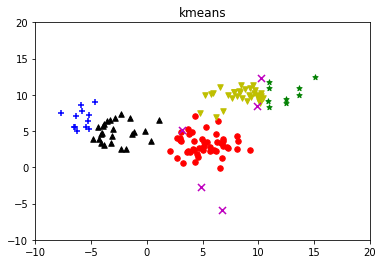

In [48]:
from pylab import *
from numpy import *
import codecs
import matplotlib.pyplot as plt

data=[]
labels=[]
k = 5 # 聚类数目

#数据读取
with codecs.open("./data1.txt","r") as f:
    for line in f.readlines():
        x,y,label=line.strip().split('\t')
        data.append([float(x),float(y)])
        labels.append(float(label))
datas=array(data)

#计算欧式距离
def distance(x1,x2):
    return sqrt(sum(power(x1-x2,2)))

#随机初始化类中心
def randcenter(set,k):
    dim=shape(set)[1]
    init_cen=zeros((k,dim))
    for i in range(dim):
        min_i=min(set[:,i])
        range_i=float(max(set[:,i]) - min_i)
        init_cen[:,i]=min_i + range_i*random.rand(k)
    return init_cen

#主程序
def Kmeans(dataset,k):
    row_m=shape(dataset)[0]
    cluster_assign=zeros((row_m,2))
    center = randcenter(dataset,k)
    change=True
    while change:
        change=False
        for i in range(row_m):
            mindist=inf
            min_index=-1
            for j in range(k):
                distance1=distance(center[j,:],dataset[i,:])
                if distance1<mindist:
                    mindist=distance1
                    min_index=j
            if cluster_assign[i,0] != min_index:
                change=True
            cluster_assign[i,:]=min_index,mindist**2
        for cen in range(k):
            cluster_data=dataset[nonzero(cluster_assign[:,0]==cen)]
            center[cen,:]=mean(cluster_data,0)
    return center ,cluster_assign

cluster_center,cluster_assign=Kmeans(datas,k)
print(cluster_center)
#设置x,y轴的范围
xlim(-10, 20)
ylim(-10, 20)
#做散点图
plt.title('kmeans')
f1 = plt.figure(1)
plt.scatter(datas[nonzero(cluster_assign[:,0]==0),0],datas[nonzero(cluster_assign[:,0]==0),1],marker='o',color='r',label='0',s=30)
plt.scatter(datas[nonzero(cluster_assign[:,0]==1),0],datas[nonzero(cluster_assign[:,0]==1),1],marker='+',color='b',label='1',s=30)
plt.scatter(datas[nonzero(cluster_assign[:,0]==2),0],datas[nonzero(cluster_assign[:,0]==2),1],marker='*',color='g',label='2',s=30)
plt.scatter(datas[nonzero(cluster_assign[:, 0] == 3), 0], datas[nonzero(cluster_assign[:, 0] == 3), 1], marker='v',
            color='y', label='3', s=30)
plt.scatter(datas[nonzero(cluster_assign[:, 0] == 4), 0], datas[nonzero(cluster_assign[:, 0] == 4), 1], marker='^',
            color='k', label='4', s=30)
plt.scatter(cluster_center[:, 1],cluster_center[:, 0],marker = 'x', color = 'm', s = 50)
plt.show()

* Kmeans++

[[ 5.563847    2.4920367 ]
 [-2.89503436  4.81432059]
 [-5.89275795  6.72476066]
 [ 4.05771281  5.21576148]
 [ 9.45483585 10.0809068 ]]


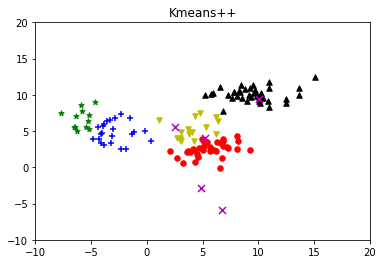

In [49]:
from pylab import *
from numpy import *
import codecs
import matplotlib.pyplot as plt

data=[]
labels=[]
k = 5 

#数据读取
with codecs.open("./data1.txt","r") as f:
    for line in f.readlines():
        x,y,label=line.strip().split('\t')
        data.append([float(x),float(y)])
        labels.append(float(label))
datas=array(data)
 
#计算欧氏距离
def distance(x1,x2):
    return sqrt(sum(power(x1-x2,2)))
 
#对一个样本找到与该样本距离最近的聚类中心
def nearest(point, cluster_centers):
    min_dist = inf
    m = np.shape(cluster_centers)[0]  # 当前已经初始化的聚类中心的个数
    for i in range(m):
        # 计算point与每个聚类中心之间的距离
        d = distance(point, cluster_centers[i, ])
        # 选择最短距离
        if min_dist > d:
            min_dist = d
    return min_dist

#选择尽可能相距较远的类中心
def get_centroids(dataset, k):
    m, n = np.shape(dataset)
    cluster_centers = np.zeros((k , n))
    index = np.random.randint(0, m)
    cluster_centers[0,] = dataset[index, ]
    # 2、初始化一个距离的序列
    d = [0.0 for _ in range(m)]
    for i in range(1, k):
        sum_all = 0
        for j in range(m):
            # 3、对每一个样本找到最近的聚类中心点
            d[j] = nearest(dataset[j, ], cluster_centers[0:i, ])
            # 4、将所有的最短距离相加
            sum_all += d[j]
        # 5、取得sum_all之间的随机值
        sum_all *= random.rand()
        # 6、获得距离最远的样本点作为聚类中心点
        for j, di in enumerate(d):
            sum_all=sum_all - di
            if sum_all > 0:
                continue
            cluster_centers[i,] = dataset[j, ]
            break
    return cluster_centers
 
#主程序
def KmeansPlus(dataset,k):
    row_m=shape(dataset)[0]
    cluster_assign=zeros((row_m,2))
    center=get_centroids(dataset,k)
    change=True
    while change:
        change=False
        for i in range(row_m):
            mindist=inf
            min_index=-1
            for j in range(k):
                distance1=distance(center[j,:],dataset[i,:])
                if distance1<mindist:
                    mindist=distance1
                    min_index=j
            if cluster_assign[i,0] != min_index:
                change=True
            cluster_assign[i,:]=min_index,mindist**2
        for cen in range(k):
            cluster_data=dataset[nonzero(cluster_assign[:,0]==cen)]
            center[cen,:]=mean(cluster_data,0)
    return center ,cluster_assign

cluster_center,cluster_assign=KmeansPlus(datas,k)
print(cluster_center)
 
#设置x,y轴的范围
xlim(-10, 20)
ylim(-10, 20)
#做散点图
plt.title('Kmeans++')
f1 = plt.figure(1)
plt.scatter(datas[nonzero(cluster_assign[:, 0] == 0), 0], datas[nonzero(cluster_assign[:, 0] == 0), 1], marker='o',
            color='r', label='0', s=30)
plt.scatter(datas[nonzero(cluster_assign[:, 0] == 1), 0], datas[nonzero(cluster_assign[:, 0] == 1), 1], marker='+',
            color='b', label='1', s=30)
plt.scatter(datas[nonzero(cluster_assign[:, 0] == 2), 0], datas[nonzero(cluster_assign[:, 0] == 2), 1], marker='*',
            color='g', label='2', s=30)
plt.scatter(datas[nonzero(cluster_assign[:, 0] == 3), 0], datas[nonzero(cluster_assign[:, 0] == 3), 1], marker='v',
            color='y', label='3', s=30)
plt.scatter(datas[nonzero(cluster_assign[:, 0] == 4), 0], datas[nonzero(cluster_assign[:, 0] == 4), 1], marker='^',
            color='k', label='4', s=30)
plt.scatter(cluster_center[:, 1], cluster_center[:, 0], marker='x', color='m', s=50)
plt.show()

* Meanshift

----------1.load data ------------
----------2.training ------------
	iteration : 1
	iteration : 2
	iteration : 3
	iteration : 4
	iteration : 5
	iteration : 6
	iteration : 7
	iteration : 8
	iteration : 9
	iteration : 10
	iteration : 11
	iteration : 12
	iteration : 13
	iteration : 14
	iteration : 15
	iteration : 16
	iteration : 17
	iteration : 18
	iteration : 19
	iteration : 20
	iteration : 21
	iteration : 22
	iteration : 23
	iteration : 24
	iteration : 25
	iteration : 26
	iteration : 27
	iteration : 28


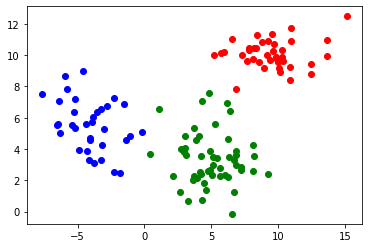

In [51]:
import math
import numpy as np
import matplotlib.pyplot as plt
MIN_DISTANCE = 0.000001  # mini error

def load_data(path, feature_num=2):
    '''导入数据
    input:  path(string)文件的存储位置
            feature_num(int)特征的个数
    output: data(array)特征
    '''
    f = open(path)  # 打开文件
    data = []
    for line in f.readlines():
        lines = line.strip().split("\t")
        data_tmp = []
        if len(lines) != feature_num:  # 判断特征的个数是否正确
            continue
        for i in range(feature_num):
            data_tmp.append(float(lines[i]))
        data.append(data_tmp)
    f.close()  # 关闭文件
    return data

def gaussian_kernel(distance, bandwidth):
    '''高斯核函数
    input:  distance(mat):欧式距离
            bandwidth(int):核函数的带宽
    output: gaussian_val(mat):高斯函数值
    '''
    m = np.shape(distance)[0]  # 样本个数
    right = np.mat(np.zeros((m, 1)))  # mX1的矩阵
    for i in range(m):
        right[i, 0] = (-0.5 * distance[i] * distance[i].T) / (bandwidth * bandwidth)
        right[i, 0] = np.exp(right[i, 0])
    left = 1 / (bandwidth * math.sqrt(2 * math.pi))
    
    gaussian_val = left * right
    return gaussian_val

def shift_point(point, points, kernel_bandwidth):
    '''计算均值漂移点
    input:  point(mat)需要计算的点
            points(array)所有的样本点
            kernel_bandwidth(int)核函数的带宽
    output: point_shifted(mat)漂移后的点
    '''
    points = np.mat(points)
    m = np.shape(points)[0]  # 样本的个数
    # 计算距离
    point_distances = np.mat(np.zeros((m, 1)))
    for i in range(m):
        point_distances[i, 0] = euclidean_dist(point, points[i])
    
    # 计算高斯核        
    point_weights = gaussian_kernel(point_distances, kernel_bandwidth)  # mX1的矩阵
    
    # 计算分母
    all_sum = 0.0
    for i in range(m):
        all_sum += point_weights[i, 0]
    
    # 均值偏移
    point_shifted = point_weights.T * points / all_sum
    return point_shifted

def euclidean_dist(pointA, pointB):
    '''计算欧式距离
    input:  pointA(mat):A点的坐标
            pointB(mat):B点的坐标
    output: math.sqrt(total):两点之间的欧式距离
    '''
    # 计算pointA和pointB之间的欧式距离
    total = (pointA - pointB) * (pointA - pointB).T
    return math.sqrt(total)  # 欧式距离

def group_points(mean_shift_points):
    '''计算所属的类别
    input:  mean_shift_points(mat):漂移向量
    output: group_assignment(array):所属类别
    '''
    group_assignment = []
    m, n = np.shape(mean_shift_points)
    index = 0
    index_dict = {}
    for i in range(m):
        item = []
        for j in range(n):
            item.append(str(("%5.2f" % mean_shift_points[i, j])))
           
        item_1 = "_".join(item)
        if item_1 not in index_dict:
            index_dict[item_1] = index
            index += 1
   
    for i in range(m):
        item = []
        for j in range(n):
            item.append(str(("%5.2f" % mean_shift_points[i, j])))

        item_1 = "_".join(item)
        group_assignment.append(index_dict[item_1])

    return group_assignment

# 迭代更新漂移均值（训练过程）
def train_mean_shift(points, kenel_bandwidth=2):
    '''训练Mean shift模型
    input:  points(array):特征数据
            kenel_bandwidth(int):核函数的带宽
    output: points(mat):特征点
            mean_shift_points(mat):均值漂移点
            group(array):类别
    '''
    mean_shift_points = np.mat(points)
    max_min_dist = 1
    iteration = 0  # 训练的代数
    m = np.shape(mean_shift_points)[0]  # 样本的个数
    need_shift = [True] * m  # 标记是否需要漂移

    # 计算均值漂移向量
    while max_min_dist > MIN_DISTANCE:
        max_min_dist = 0
        iteration += 1
        print("\titeration : " + str(iteration))
        for i in range(0, m):
            # 判断每一个样本点是否需要计算偏移均值
            if not need_shift[i]:
                continue
            p_new = mean_shift_points[i]
            p_new_start = p_new
            p_new = shift_point(p_new, points, kenel_bandwidth)  # 对样本点进行漂移
            dist = euclidean_dist(p_new, p_new_start)  # 计算该点与漂移后的点之间的距离

            if dist > max_min_dist:
                max_min_dist = dist
            if dist < MIN_DISTANCE:  # 不需要移动
                need_shift[i] = False

            mean_shift_points[i] = p_new

    # 计算最终的group
    group = group_points(mean_shift_points)  # 计算所属的类别
    
    return np.mat(points), mean_shift_points, group

def save_result(file_name, data):
    '''保存最终的计算结果
    input:  file_name(string):存储的文件名
            data(mat):需要保存的文件
    '''
    f = open(file_name, "w")
    m, n = np.shape(data)
    for i in range(m):
        tmp = []
        for j in range(n):
            tmp.append(str(data[i, j]))
        f.write("\t".join(tmp) + "\n")
    f.close()
    

if __name__ == "__main__":
    color=['.r','.g','.b','.y']#颜色种类
    # 导入数据集
    print ("----------1.load data ------------")
    data = load_data("data", 2)
    N = len(data)
    # 训练，h=2
    print ("----------2.training ------------")
    points, shift_points, cluster = train_mean_shift(data, 2)
    # 保存所属的类别文件
    
   # save_result("center_1", shift_points) 
    data = np.array(data)
    for i in range(N):
        if cluster[i]==0:
            plt.plot(data[i, 0], data[i, 1],'ro')
        elif cluster[i]==1:
            plt.plot(data[i, 0], data[i, 1],'go')
        elif cluster[i]==2:
            plt.plot(data[i, 0], data[i, 1],'bo')
            
    plt.show() 




* DBSCAN

共有3 个簇
共有3 个簇
共有2 个簇


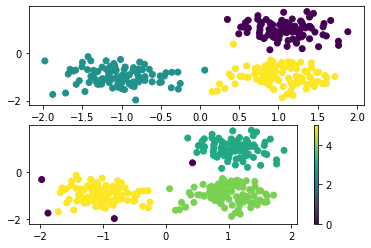

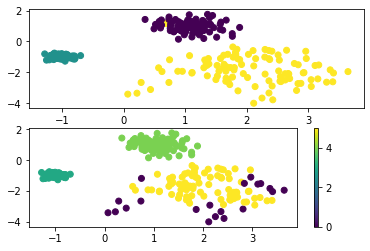

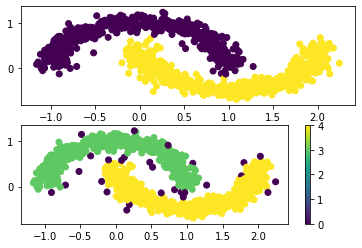

In [52]:
import numpy as np
import matplotlib.pyplot as plt
import copy
from sklearn.datasets import make_moons
from sklearn.datasets.samples_generator import make_blobs
import random


class DBSCAN():
    def __init__(self, epsilon, MinPts):
        self.epsilon = epsilon
        self.MinPts = MinPts

    def dist(self, x1, x2):
        return np.linalg.norm(x1 - x2)

    def getCoreObjectSet(self, X):
        N = X.shape[0]
        Dist = np.eye(N) * 9999999
        CoreObjectIndex = []
        for i in range(N):
            for j in range(N):
                if i > j:
                    Dist[i][j] = self.dist(X[i], X[j])
        for i in range(N):
            for j in range(N):
                if i < j:
                    Dist[i][j] = Dist[j][i]
        for i in range(N):
            # 获取对象周围小于epsilon的点的个数
            dist = Dist[i]
            num = dist[dist < self.epsilon].shape[0]
            if num >= self.MinPts:
                CoreObjectIndex.append(i)
        return np.array(CoreObjectIndex), Dist

    def element_delete(self, a, b):
        if isinstance(b, np.ndarray) == False:
            b = np.array([b])
        for i in range(b.shape[0]):
            index = np.where(a == b[i])
            a = np.delete(a, index[0])
        return a

    def fit(self, X):
        N = X.shape[0]
        CoreObjectIndex, Dist = self.getCoreObjectSet(X)
        self.k = 0
        self.C = []
        UnvisitedObjectIndex = np.arange(N)

        while(CoreObjectIndex.shape[0] != 0):
            old_UnvisitedObjectIndex = copy.deepcopy(
                UnvisitedObjectIndex)  # 记录当前未访问的样本id
            OriginIndex = np.random.choice(
                CoreObjectIndex.shape[0], 1, replace=False)  # 随机选取一个核心对象
            Queue = np.array([-1, CoreObjectIndex[OriginIndex]])  # 初始化队列

            CoreObjectIndex = self.element_delete(
                CoreObjectIndex, CoreObjectIndex[OriginIndex])  # 将核心对象id从id集合中除去
            while(Queue.shape[0] != 1):
                # 取出队列中首个样本id
                index = Queue[0]
                if index == -1:
                    Queue = np.delete(Queue, 0)
                    Queue = np.append(Queue, -1)
                    continue

                Queue = self.element_delete(Queue, index)
                index = int(index)
                DistWithOthers = Dist[index]
                OthersIndex = np.where(DistWithOthers < self.epsilon)[0]
                num = OthersIndex.shape[0]
                if num >= self.MinPts:
                    delta = list(set(OthersIndex).intersection(
                        set(UnvisitedObjectIndex)))  # 取核心对象内的样本和未访问样本集合的交集
                    delta = np.array(delta)
                    Queue = np.append(Queue, delta)
                    UnvisitedObjectIndex = self.element_delete(
                        UnvisitedObjectIndex, delta)

            self.k += 1
            self.C.append(
                self.element_delete(old_UnvisitedObjectIndex, UnvisitedObjectIndex))
            CoreObjectIndex = self.element_delete(
                CoreObjectIndex, self.C[self.k - 1])
        print("共有{} 个簇".format(self.k))

        Y = np.zeros(X.shape[0])
        for i in range(self.k):
            Y[self.C[i]] = i + 3

        return Y

    def plt_show(self, X, Y, pre_Y, name=0):
        if X.shape[1] == 2:
            fig = plt.figure(name)
            plt.subplot(211)
            plt.scatter(X[:, 0], X[:, 1], marker='o', c=Y)
            plt.subplot(212)
            plt.scatter(X[:, 0], X[:, 1], marker='o', c=pre_Y)
            plt.colorbar()
        else:
            print('error arg')


if __name__ == '__main__':

    center = [[1, 1], [-1, -1], [1, -1]]
    cluster_std = 0.35
    X1, Y1 = make_blobs(n_samples=300, centers=center,
                        n_features=2, cluster_std=cluster_std, random_state=1)

    dbscan1 = DBSCAN(epsilon=0.4, MinPts=5)
    pre_Y1 = dbscan1.fit(X1)
    dbscan1.plt_show(X1, Y1, pre_Y1, name=1)

    center = [[1, 1], [-1, -1], [2, -2]]
    cluster_std = [0.35, 0.1, 0.8]
    X2, Y2 = make_blobs(n_samples=300, centers=center,
                        n_features=2, cluster_std=cluster_std, random_state=1)

    dbscan2 = DBSCAN(epsilon=0.4, MinPts=5)
    pre_Y2 = dbscan2.fit(X2)
    dbscan2.plt_show(X2, Y2, pre_Y2, name=2)

    X3, Y3 = make_moons(n_samples=1000, noise=0.1)
    dbscan3 = DBSCAN(epsilon=0.1, MinPts=5)
    pre_Y3 = dbscan3.fit(X3)
    dbscan3.plt_show(X3, Y3, pre_Y3, name=3)

    plt.show()



##### 对于3类密度均匀的类别样本集，DBSCAN可以很好的聚类,第二幅图像中，紫色点为异常点;对于3类密度不均匀的类别样本集，DBSCAN的聚类效果有点差，黄色类别的样本集中出现了很多异常点（第四幅图）;对于不是高斯分布的样本集，密度聚类的效果比原型聚类要强很多

#### 作业2 搭建LaneNet网络（数据读取，图像语义分割和聚类分支）

* 具体见.py文件

#### 备注：
* 数据读取 dataset.py
* 图像语义分割 semantic_segmentation.py
* 聚类分支 postprocess.py